<a href="https://colab.research.google.com/github/chacha86/BigData3/blob/colab/%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%ED%9A%8C%EA%B7%80%2C%20%EC%84%A0%ED%98%95%20%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


fish = pd.read_csv('/content/Fish.csv')
fish

# 도미의 길이로 무게를 예측
perch_length = fish[fish['Species'] == 'Perch']['Length1'].values
perch_weight = fish[fish['Species'] == 'Perch']['Weight'].values

# 데이터 현황 시각화
plt.scatter(perch_length, perch_weight)

from sklearn.model_selection import train_test_split 

# 학습데이터 준비
# 정답데이터

# 테스트데이터 준비
# 데스트데이터 정답 준비

trd, tsd, trt, tst = train_test_split(perch_length, perch_weight, random_state=10) # 학습데이터와 테스트데이터로 나누어줌. 기본 비율 학습 75%, random_state는 데이터를 섞을 때 일관된 결과를 보장


from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3) # n_neighbors값은 참고할 이웃의 개수를 결정
# np.expand_dims(trd, axis=1)


trd = trd.reshape(-1, 1) # 학습데이터는 2차원 배열이어야 한다.
tsd = tsd.reshape(-1, 1)

knr.fit(trd, trt) # 최근접 이웃 회귀 학습 진행

knr.score(trd, trt), knr.score(tsd, tst) # 학습데이터로 평가 -> 잘 학습 했는지 확인. 테스트데이터로 평가 -> 잘 예측하는지
# 학습데이터 평가지표가 높고, 테스트데이터 평가 지표가 낮으면 -> 특수한 데이터 상황(학습할 때 사용했던)에서만 적중률이 높다. => 과대적합(overfitting)
# 학습데이터 평가지표가 낮고, 테스트데이터 평가 지표가 높으면 -> 학습이 제대로 되지 않았기 때문에 올바른 예측을 할 수가 없다. 과소적합(underfitting)
# 학습데이터 평가지표가 낮고, 테스트데이터 평가 지표도 낮으면 -> 과소적합(underfitting)


print(trd[3]) # 학습데이터의 3번 값
print(trt[3]) # 학습데이터 3번에 대한 정답
knr.predict(trd[3]) # 실제 정답과는 다르게 나옴. 최근접 이웃 회귀는 정해진 개수의 이웃을 선택해 평균을 내는 방식이기 때문.

# 이웃을 많이 잡으면 일반적인 패턴에 잘 대응할 수 있으나 예측률이 떨어짐
# 이웃을 적게 잡으면 특정 패턴에서 높은 예측률을 보이나 데이터가 바뀌면 정확도가 떨어짐.
# k값을 잘 조정하면서 최적의 값을 찾아야함.


In [ ]:
# 최근접 이웃 회귀의 단점
# 데이터간의 거리를 이용해 이웃을 정하기 때문에 데이터 거리가 멀어지면 정확도가 떨어짐.

# 실제 데이터간의 거리가 먼 경우를 시각화를 이용해 확인
plt.scatter(perch_length, perch_weight)
plt.scatter(40.1, 1100, marker='v')

dist, idx = knr.kneighbors([[40.1]]) 

print(idx)
# plt.scatter(trd[3], trt[3], marker="D")
# plt.scatter(trd[27], trt[27], marker="D")
# plt.scatter(trd[30], trt[30], marker="D")

knr.predict([[50.1]])
plt.scatter(50.1, 1033, marker='*')


dist, idx = knr.kneighbors([[100.1]]) # 일정 길이를 넘어가면 선택되는 이웃이 항상 같음.

plt.scatter(trd[3], trt[3])
plt.scatter(trd[27], trt[27])
plt.scatter(trd[30], trt[30])

[35.96666667]


1080

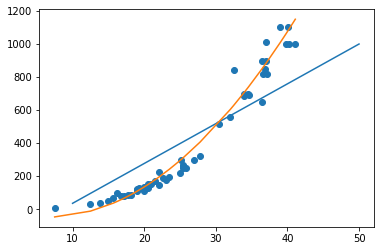

In [ ]:
plt.scatter(perch_length, perch_weight)

print(knr.predict([[10]]))

plt.plot([10, 50], [36, 1000])
x = np.squeeze(trd, axis=1)
x = np.sort(x)

plt.plot(x, x**2 - 13*x -5)

40 ** 2 - 13*40


array([477.44631912])

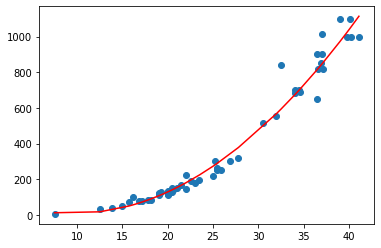

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(trd, trt)
lr.score(trd, trt), lr.score(tsd, tst)

# 특성을 늘린다.
# ax + b (x가 길이) 
# ax^2 + bx + c

trd_sqr = trd ** 2
trd_sqr, trd

trd2 = np.concatenate((trd_sqr, trd), axis=1)

tsd_sqr = tsd ** 2
tsd2 = np.concatenate((tsd_sqr, tsd), axis=1)

lr.fit(trd2, trt)
lr.score(trd2, trt), lr.score(tsd2, tst)
# 특성(feature) 가 많을 수록 정확도가 올라간다.
# 길이로 무게 추정
# 길이 + 너비로 무게 추정
# 길이 + 너비 + 높이 무게 추정

# 특성이 길이 하나면 길이를 제곱해서 새로운 특성을 만들어 낼 수 있다.
lr.predict([[50.1 ** 2, 50.1]])

lr.coef_ # 기울기
lr.intercept_ # 절편

lr.coef_, lr.intercept_

plt.scatter(perch_length, perch_weight)
x = np.squeeze(trd, axis=1)
x = np.sort(x)

plt.plot(x, 1.11*(x ** 2) - 21.16 * x + 108.72, c='r')

lr.predict([[30 ** 2, 30]])


